# 【Support Vector Machine】

This project is based on moon-shaped scatter dataset. It utilizes algorithms such as linear support vector machine and non-linear support vector machine to solve binary classification problems.

# 1. Introduction

This project is based on moon-shaped scatter dataset. Utilize the support vector machine (SVM) algorithm to address the binary classification problem based on the generated dataset.

We utilized linear and non-linear support vector machines with polynomial and Gaussian RBF kernel functions to perform scatter plot binary classification. Employing visualization tools, we presented the classification results, facilitating a clear comparison of the effectiveness among different algorithms.

# 2. Project Analysis and Solution Design
This project uses the moon-shaped dataset generated by sklearn to simulate the distribution of trees on two banks. For visualization purposes, only two features of the trees are simulated here.

Utilizing linear support vector machine and non-linear support vector machine algorithms for data training, prediction evaluation, and visual analysis.

This section is divided into 4 steps: (1)Data generation and splitting; (2) Invoking the SVM class in sklearn, instantiating a support vector machine, and training it on the training set; (3) Model prediction and evaluation. (4) Visual analysis. (5) The experimental procedure is depicted in the following figure.

# 3. Project Preparation
What preparations do we need to complete this project?

Firstly, we need to set up the experimental environment. For this project, we will be using AIStudio for implementation. The experimental environment is outlined in the table below:
    
|  Name | Version  |<center> Function Description <center>|
| -------- | -------- | -------- |
| AIStudio     | Classic     | Basic platform and environment for code implementation     |
|numpy|1.19.5|Module for array processing|
|skleran|0.22.1|Classes for importing datasets and SVM usage|
|OpenCV|4.1.1.26|Utilized for image operations|
|matplotlib|2.2.3|Utilized for visualization|

# 4. Code Implementation

## 4.1 Linear SVM based on Moon-shaped Data

Below, we'll use self-generated simulated dataset to solve a binary classification problem using the support vector machine algorithm. We'll apply both linear and non-linear support vector machine algorithms to classify the dataset and compare their classification effectiveness.

### 4.1.1 Generating Dataset and Splitting

In [1]:
from sklearn import datasets  # Importing sklearn datasets
from sklearn.model_selection import train_test_split  # Importing the dataset splitting function train_test_split()

# Using the make_moons() function to randomly generate 1000 simulated samples
X, y = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.12, random_state=1)
# Splitting the dataset into training and testing sets in an 8:2 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 4.1.2 Linear SVM

In [2]:
# Model training
from sklearn import svm
# Instantiating a linear support vector machine
clf_linear = svm.SVC(kernel='linear', C=0.1)
# Model training
clf_linear.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

### 4.1.3 Visualization of Model Decision Boundary

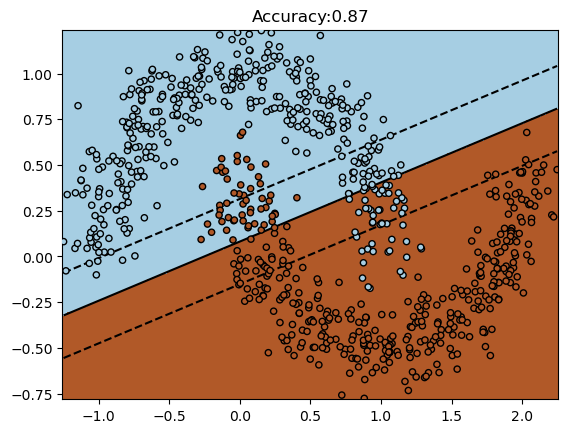

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Visualization(clf, x_train, x_test, y_train, y_test):
    # Plotting sample scatter plot
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # Plotting decision boundary, selecting minimum and maximum values
    x_min = x_train[:, 0].min()
    x_max = x_train[:, 0].max()
    y_min = x_train[:, 1].min()
    y_max = x_train[:, 1].max()
    # Generating grid matrix
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    # Calculating the distance from sample points to the hyperplane
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Plotting the test set scatter plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Representing the classifier with colored blocks
    # Using contour function to draw two decision boundaries and separating hyperplanes
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])  # levels are drawn as -0.5, 0, 0.5
    plt.title('Accuracy:{}'.format(clf.score(x_test, y_test))) # Displaying the average accuracy in the title

    

# Calling the function to visualize the model decision boundary
Visualization(clf_linear, x_train, x_test, y_train, y_test)

### 4.1.4 Prediction and Model Evaluation

In [4]:
from sklearn.metrics import classification_report

y_pred = clf_linear.predict(x_test)  # Getting the model's predictions on the test set
print(classification_report(y_test, y_pred, target_names=None))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        95
           1       0.91      0.84      0.87       105

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



## 4.2 Non-linear SVM based on Moon-shaped Data

Non-linear SVM can be divided into different types based on the kernel function used, such as 'rbf' (radial basis function kernel) and 'poly' (polynomial kernel). Below, we'll train models using radial basis function kernel support vector machine and polynomial kernel support vector machine on the iris dataset. We'll also visualize the trained models after training.

### 4.2.1 Training a Non-linear SVM Model using Polynomial Kernel Function

In [5]:
# Using a polynomial kernel function for model training, degree: the degree of the polynomial
def best(x_train, y_train, x_test, y_test):
    scores = []  # List to store accuracy scores for different degree values
    # Using a for loop to iteratively select degree values in the range [1,15) for model training and testing evaluation
    for i in range(1, 15):
        clf = svm.SVC(kernel='poly', degree=i)  # Kernel type is polynomial, selecting different degree values
        clf.fit(x_train, y_train)  # Training using the training set
        score = clf.score(x_test, y_test)  # Evaluating using classification accuracy
        scores.append(score)  # Storing the accuracy score in the list
        print('the accuracy_score is ', score)  # Viewing the score for different degrees
    best_degree = scores.index(np.max(scores)) + 1  # Finding the optimal degree value through the index of the maximum value
    print('the best degree is ', best_degree)  # Viewing the optimal degree value

best(x_train, y_train, x_test, y_test)

the accuracy_score is  0.875
the accuracy_score is  0.8
the accuracy_score is  0.935
the accuracy_score is  0.79
the accuracy_score is  0.93
the accuracy_score is  0.795
the accuracy_score is  0.915
the accuracy_score is  0.82
the accuracy_score is  0.925
the accuracy_score is  0.705
the accuracy_score is  0.8
the accuracy_score is  0.72
the accuracy_score is  0.785
the accuracy_score is  0.715
the best degree is  3


### 4.2.2 Training the model with the optimal parameters and visualizing the decision boundary

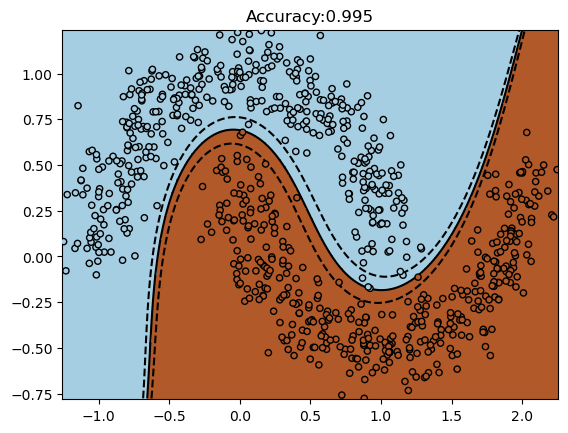

In [6]:
# Model training
from sklearn import svm
clf_poly = svm.SVC(kernel='poly', degree=3, coef0=1, C=5)
clf_poly.fit(x_train, y_train)
Visualization(clf_poly, x_train, x_test, y_train, y_test)

### 4.2.3 Visualization of Model Decision Boundary (Polynomial Kernel Function)

In [7]:
from sklearn.metrics import classification_report

y_pred = clf_poly.predict(x_test)  # Getting the model's predictions on the test set
print(classification_report(y_test, y_pred, target_names=None))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.99      1.00       105

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



### 4.2.4 Training a Non-linear SVM Model using Gaussian Kernel Function

In [24]:
# Model training
from sklearn import svm
# Instantiating a Gaussian kernel support vector machine classifier
clf_rbf = svm.SVC(kernel='rbf', degree=10, coef0=1, C=5)
# Fitting the model using the training set
clf_rbf.fit(x_train, y_train)

SVC(C=5, coef0=1, degree=10)

### 4.2.5 Visualization of Model Decision Boundary (Gaussian Kernel Function)

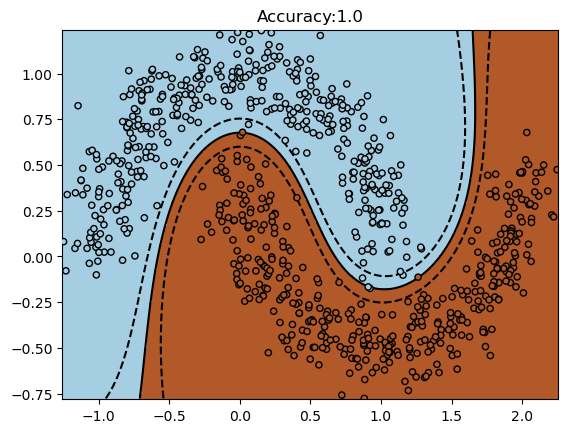

In [25]:
# Calling the decision boundary visualization function
Visualization(clf_rbf, x_train, x_test, y_train, y_test)

### 4.2.6 Prediction and Model Evaluation

In [26]:
from sklearn.metrics import classification_report

y_pred = clf_rbf.predict(x_test)  # Getting the model's predictions on the test set
print(classification_report(y_test, y_pred, target_names=None))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       105

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

